## Importação dos pacotes

In [22]:
# importar pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.utils import shuffle

In [23]:
# definir parâmetros extras
import warnings
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)

## Carga dos dados de entrada (consolidados)

In [33]:
# carregar arquivo de dados de treino
data = pd.read_csv('zoo-train-all.csv', index_col='animal_name')

# embaralhar linhas
#data = shuffle(data)
data = data.sample(frac=1)

# deixar coluna como categórica
data['class_type'] = data['class_type'].astype('category')

# mostrar alguns exemplos de registros
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
animal_name,,,,,,,,,,,,,,,,,
goat,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
adder,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3
moth,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
wart toad,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0,5
wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6


In [34]:
# 1-7 is Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate
animal_type = ['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']

data['class_name'] = data['class_type'].map(lambda x: animal_type[x-1])

data.iloc[:,-2:].head()

,class_type,class_name
animal_name,,
goat,1,Mammal
adder,3,Reptile
moth,6,Bug
wart toad,5,Amphibian
wasp,6,Bug


In [35]:
# quantos registros existem de cada espécie?
data['class_type'].value_counts()

1    41
6    20
4    20
2    20
3    17
7    16
5    10
Name: class_type, dtype: int64

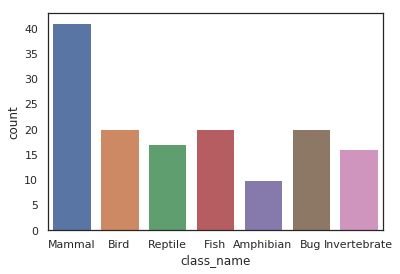

In [37]:
sns.countplot(data['class_name'])

In [39]:
data.legs.unique()

array([4, 0, 6, 2, 8, 5], dtype=int64)

In [46]:
# just curious which animal has 5 legs
data.loc[data['legs'] == 5][['class_type', 'class_name']]

,class_type,class_name
animal_name,,
starfish,7,Invertebrate


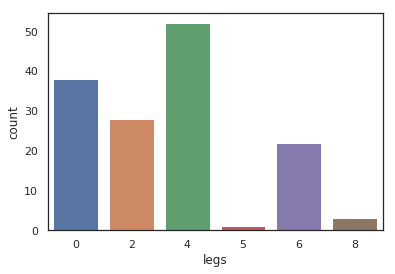

In [40]:
sns.countplot(data['legs'])

In [10]:
# gerar gráfico para analisar pares de características
#sns.pairplot(data, hue="class_type", size=3)

In [11]:
# gerar gráfico em pares com kde nas diagonais
#sns.pairplot(data, hue="class_type", size=3, diag_kind="kde")

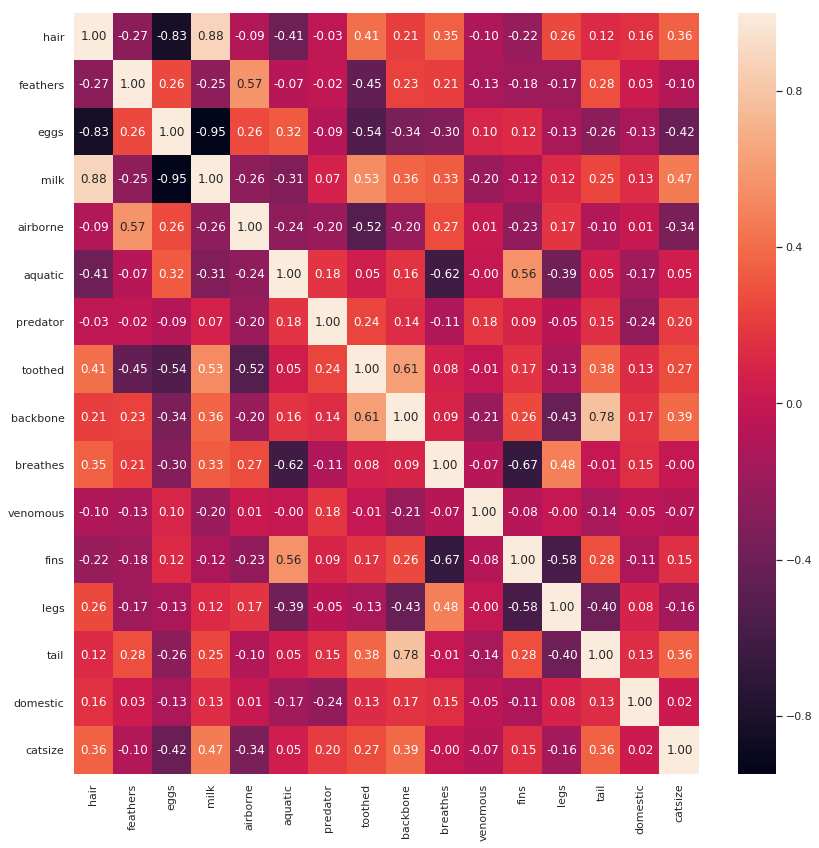

In [38]:
# gerar mapa de calor com a correlação das características
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

In [42]:
data.groupby('class_name').mean()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
class_name,,,,,,,,,,,,,,,,
Mammal,0.95122,0.0,0.024390,1.0,0.04878,0.146341,0.536585,0.975610,1.0,1.000000,0.000000,0.097561,3.365854,0.853659,0.195122,0.780488
Bird,0.00000,1.0,1.000000,0.0,0.80000,0.300000,0.450000,0.000000,1.0,1.000000,0.000000,0.000000,2.000000,1.000000,0.150000,0.300000
Reptile,0.00000,0.0,0.941176,0.0,0.00000,0.294118,0.705882,0.882353,1.0,0.941176,0.235294,0.000000,2.588235,1.000000,0.235294,0.529412
Fish,0.00000,0.0,1.000000,0.0,0.00000,1.000000,0.500000,0.700000,1.0,0.000000,0.050000,1.000000,0.000000,1.000000,0.050000,0.500000
Amphibian,0.00000,0.0,1.000000,0.0,0.00000,1.000000,0.300000,1.000000,1.0,1.000000,0.100000,0.000000,3.800000,0.300000,0.100000,0.000000
Bug,0.25000,0.0,1.000000,0.0,0.65000,0.000000,0.200000,0.000000,0.0,1.000000,0.150000,0.000000,6.000000,0.000000,0.050000,0.000000
Invertebrate,0.00000,0.0,0.937500,0.0,0.00000,0.562500,0.562500,0.062500,0.0,0.375000,0.250000,0.000000,2.812500,0.062500,0.000000,0.187500


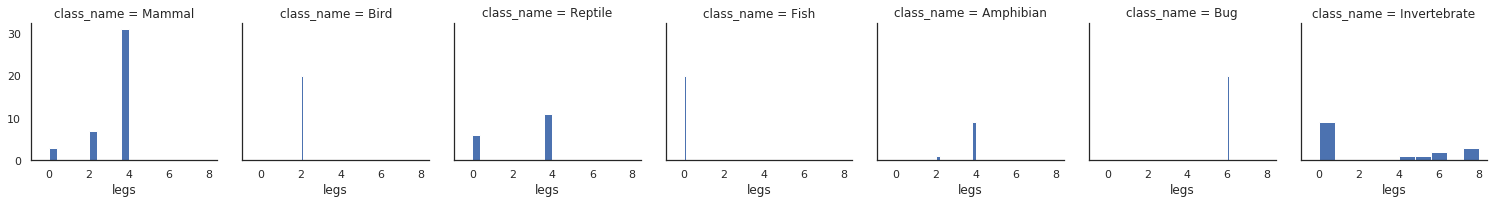

In [47]:
g = sns.FacetGrid(data, col="class_name")
g.map(plt.hist, "legs")
plt.show()